# Workshop 11
# Introduction to FFT and Signal Processing

Some examples borrowed from 

*https://www.eecis.udel.edu/~boncelet/ipython.html*



## OkPy Submission Instructions
In this lab, we will use OkPy to submit assignments, and also to grade them. At the end of the iPython notebook, you will find a line of code _ = ok.submit() that you must run to submit your assignment to OkPy. You can run this lines of code multiple times to submit revisions up until the deadline.
You must also run the very first code block that imports the OkPy modules needed to submit your assignment.

In [ ]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('Workshop11.ok')
_ = ok.auth(inline=True)

Standard preamble

In [13]:
# imports
from pylab import *
%matplotlib inline
import scipy.signal as sig
from scipy.fftpack import fft, ifft

## First, let's get used to FFT

Create an array of data and transform it. Notice normalization of the transform !

In [19]:
x = array([1,-1,1,-1])
print(fft(x))

[ 0.+0.j  0.+0.j  4.+0.j  0.-0.j]


You can specify the number of points to transform. If n>shape(x), then the array is zero-padded (i.e. in the case below 4 zeros are added to the end of the array)

In [20]:
print(fft(x,n=8))

[ 0.+0.j          1.+0.41421356j  0.-0.j          1.+2.41421356j  4.+0.j
  1.-2.41421356j  0.+0.j          1.-0.41421356j]


You can do transform forwards and backwards

In [21]:
y = fft(x)
xhat = ifft(y)
print(x-xhat)

[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]


Now let's see how you can plot FFT

(0, 8)

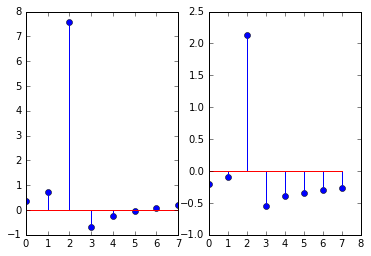

In [23]:
x = exp(1j*2.1*2*pi*arange(8)/8)
y = fft(x)
subplot(1,2,1)
stem(real(y))
subplot(1,2,2)
stem(imag(y))
xlim([0,8])

<Container object of 3 artists>

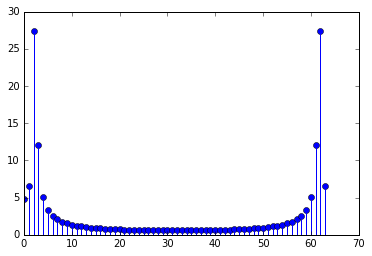

In [24]:
N=64
omega = 2.3*2*pi/N
n = arange(N)
x = cos(omega*n)
y = fft(x)
stem(abs(y))

### Generate specific signal with noise

In [100]:
N=256
sigma = 1.0
omega = 2*pi*35/N
omega2 = 2*pi*44/N
#x = exp(omega*1j*arange(N))
x = cos(omega*arange(N))+2*sin(omega2*arange(N))

How many signals can you see if you plot this ? 

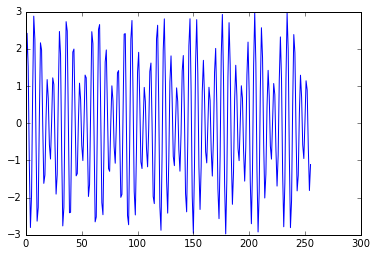

In [101]:
plot(x)

Add noise

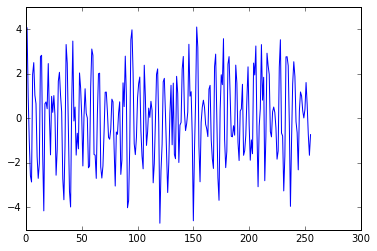

In [102]:
x += sigma*randn(N)
plot(x) 

Let's run FFT on it. Notice how clean the separation is between two signals and noise

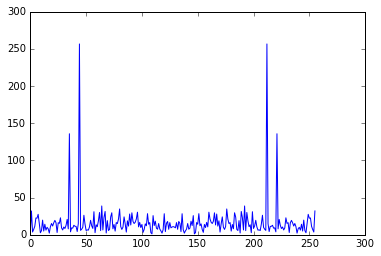

In [103]:
y = fft(x)
plot(abs(y))

It is important to pay attention to normalization ! 

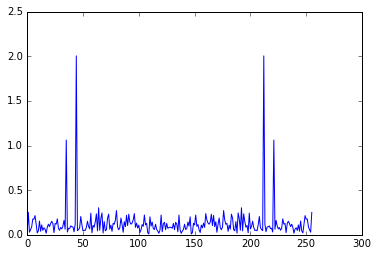

In [104]:
y /= N/2
plot(abs(y))

Plot real and imaginary parts of the two signals. Since the second Nyquist band is redundant, can limit the axes

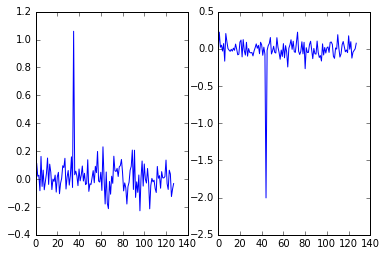

In [105]:
subplot(1,2,1)
plot(real(y[0:N/2]))
subplot(1,2,2)
plot(imag(y[0:N/2]))

### Exercise 1:

Vary parameters omega1, omega2, N, and sigma to get a feel for how FFT does, and also how the peaks 

## Basics of filtering

## Low Pass filter

<Container object of 3 artists>

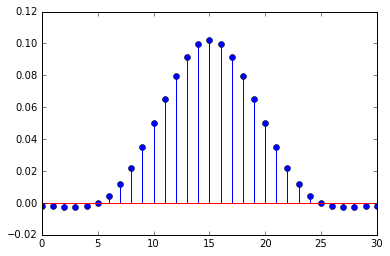

In [106]:
# 31-tap filter
h = sig.firwin(31,0.1)

# plot in the time domain
stem(list(range(len(h))),h)

<Container object of 3 artists>

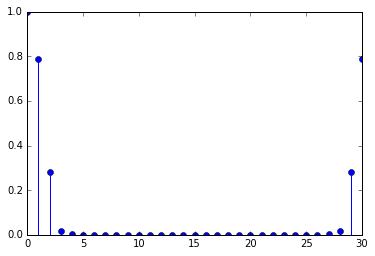

In [107]:
# plot in the frequency domain
stem(list(range(len(h))),abs(fft(h)))

But of course the filter knows about its own frequency response. Can plot in dB units. 

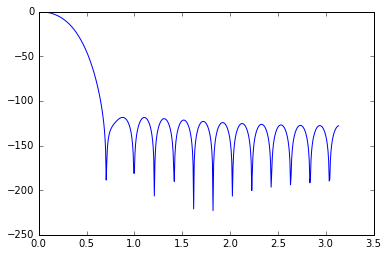

In [108]:
w, v = sig.freqz(h)
plot(w,20*log(abs(v)))

Apply filter

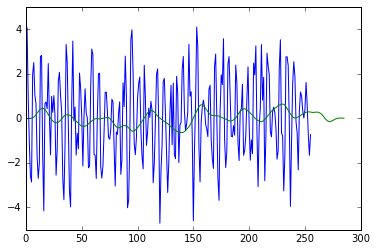

In [110]:
plot(x)
plot(convolve(x,h))

### Exercise 2:

Vary parameters of the filter (# of taps, bandwidth, filter type) and remake the plots above

## Bandpass Filter

Notice how the bandpass filter's impulse response matches the intended signal.  It oscillates slowly between positive and negative values, much like a sinusoid at the signal frequency

<Container object of 3 artists>

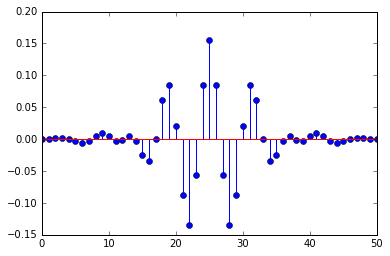

In [128]:
hbp = sig.firwin(51, [30./(N/2.),50./(N/2.)], pass_zero=False)
stem(list(range(len(hbp))),hbp)

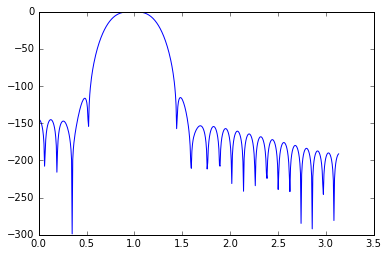

In [129]:
w, v = sig.freqz(hbp)
plot(w, 20*log(abs(v)))

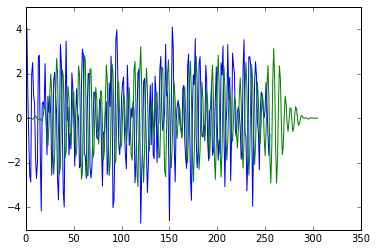

In [134]:
xbp = convolve(x,hbp)
plot(x)
plot(xbp)

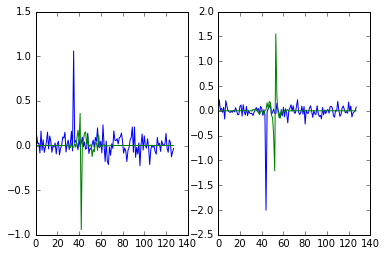

In [132]:
# plot fft of that
ybp = fft(xbp)/(N/2.)

subplot(1,2,1)
plot(real(y[0:N/2]))
plot(real(ybp[0:N/2]))
subplot(1,2,2)
plot(imag(y[0:N/2]))
plot(imag(ybp[0:N/2]))

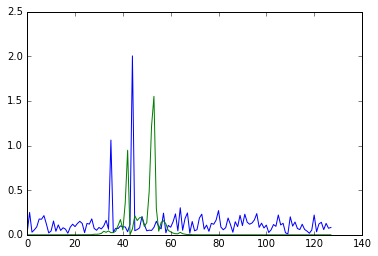

In [133]:
plot(abs(y[0:N/2]))
plot(abs(ybp[0:N/2]))

### Exercise 3:

1. Think if you understand these plots (e.g., why is there an offset ?)
1. Vary parameters of the filter and remake the plots

## Submission
Please run this line of code to submit your work to OkPy.

In [ ]:
_ = ok.submit()